**Olist Products Data**

# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import Data

In [3]:
products_data= pd.read_csv("C:\\Users\\USER\Desktop\\olist_products_dataset.csv")
product_category_name_translation_data=pd.read_csv("C:\\Users\\USER\\Desktop\\product_category_name_translation (1).csv")

# Data Exploration

*Inspecting the Data*

In [4]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Analysis: From this brief overview, we can make a few observations:

- **product_description_length** shows a considerable variance, indicating that some products have much more detailed descriptions than others.

- The column names **product_name_lenght** and **product_description_lenght** contain typos and should be corrected to **product_name_length** and **product_description_length** respectively. This is important for maintaining consistency and avoiding errors in future data handling.

In [5]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Analysis:

- The DataFrame products_data contains **32,951 entries**, indexed from 0 to 32,950.

- There are **9 columns** in the DataFrame: product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, and product_width_cm.

- There are **610 missing values** in product_category_name, product_name_length, product_description_length, and product_photos_qty. Additionally, there are **2 missing values** in product_weight_g, product_length_cm, product_height_cm, and product_width_cm. We shall deal with these missing values by imputing them through extracting the details from identical products.

- The data types (Dtype) of the columns are as follows: 
    - product_id: object, which typically means it contains text strings.
    - product_category_name: object
    - The other columns are of type float64, indicating they contain floating-point numbers.

In [6]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Analysis:

- **Count**: The dataset has 32,341 non-null entries for most product-related features, indicating missing data for a small subset.

- **Mean**: On average, product names are 48.47 characters long, and descriptions are about 771.50 characters. Products typically have 2.19 photos each.

- **Standard Deviation**: There's considerable variation in description length (std: 635.11) and product weight (std: 4282.04).

- **Min/Max**: Product name lengths range from 5 to 76 characters, and description lengths from 4 to 3,992 characters. The number of product photos ranges from 1 to 20. Weight varies significantly from 0 to 40,425 grams.

- **Quartiles**: The 25th, 50th (median), and 75th percentiles show a moderate spread in name lengths (42-57 characters) and a wider spread in description lengths (339-972 characters), suggesting more diversity in how products are described.

In [7]:
# Function to check if the string is lowercase and uses underscores instead of spaces
def find_nonconforming_entries(dataframe, column_name):
    nonconforming_entries = []

    for entry in dataframe[column_name]:
        # Convert to string and skip over NaN or None entries
        if pd.isna(entry):
            continue
        entry_str = str(entry)
        # Check if the entry is not lowercase or does not use underscores instead of spaces
        if ' ' in entry_str or (not entry_str.replace('_', '').islower()):
            nonconforming_entries.append(entry_str)

    return nonconforming_entries

# Get the nonconforming entries in column 'x'
nonconforming = find_nonconforming_entries(products_data, 'product_category_name')

print(f"Entries in column 'product_category_name' that don't meet the condition: {nonconforming}")

Entries in column 'product_category_name' that don't meet the condition: []


Analysis:

We made sure that all product category names are fully lowercase, and have "_" linking one word and another if the category name consists of more than one word. This is crucial later on to store our data in SQL.

In [8]:
for column in products_data.select_dtypes(include=['object']).columns:
    print(f"Number of unique values in {column}: {products_data[column].nunique()}")

Number of unique values in product_id: 32951
Number of unique values in product_category_name: 73


In [9]:
# Unique values of product_category_name in products_data
products_data_categories = set(products_data['product_category_name'].unique())

# Unique values of product_category_name in product_category_name_translation_data
translation_data_categories = set(product_category_name_translation_data['product_category_name'].unique())

# Values present in product_category_name_translation_data but not in products_data
missing_in_products_data = translation_data_categories - products_data_categories

# Values present in products_data but not in product_category_name_translation_data
missing_in_translation_data = products_data_categories - translation_data_categories

print("Values present in product_category_name_translation_data but not in products_data:")
print(missing_in_products_data)
print("\nValues present in products_data but not in product_category_name_translation_data:")
print(missing_in_translation_data)


Values present in product_category_name_translation_data but not in products_data:
set()

Values present in products_data but not in product_category_name_translation_data:
{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}


In [10]:
# Unique values of product_category_name in products_data
products_data_categories = products_data['product_category_name'].unique()

# Unique values of product_category_name in product_category_name_translation_data
translation_data_categories = product_category_name_translation_data['product_category_name'].unique()

print("Unique values of product_category_name in products_data:")
print(products_data_categories)

print("\nUnique values of product_category_name in product_category_name_translation_data:")
print(translation_data_categories)


Unique values of product_category_name in products_data:
['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos

Analysis:

- We noticed that the number of **unique values** for product_category_name are different for two dataframes we are working with which are **products_data** and **product_category_name_translation_data**.

- Investigating further, we can conclude that these unique values **'portateis_cozinha_e_preparadores_de_alimentos'**, **'pc_gamer'**, and **nan** are found in **products_data** dataframe but not in **product_category_name_translation_data** dataframe. Further, in the **data cleaning** stage, we will need to **add two rows** to **product_category_name_translation_data** of the missing values and **provide translations** for them in English in the dedicated column.

In [11]:
products_data.shape

(32951, 9)

Analysis: The dataset consists of 32951 rows and 9 columns.

*Dealing with Missing Values: Checking for Missing Values*

In [12]:
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Analysis: 

- As previously concluded, there are **610 missing values** in product_category_name, product_name_length, product_description_length, and product_photos_qty. Additionally, there are **2 missing values** in product_weight_g, product_length_cm, product_height_cm, and product_width_cm. 

- We will need to address these in data cleaning, when necessary by dropping some rows with missing values.

In [13]:
# Identify rows with missing values in the specified columns
missing_values_rows = products_data[
    products_data[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().any(axis=1)
]

# Display rows with missing values
print(missing_values_rows)

                             product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN  


Analysis:

Only two rows with indexes 8578 and 18851 have missing weight, length, height, and width information. We shall drop these rows in the data cleaning phase.

*Dealing with Duplicates: Checking for duplicates*

In [14]:
def check_duplicates(df):
    duplicate_rows = df.duplicated()
    print(f"Number of duplicate rows: {duplicate_rows.sum()}")

    # If you want to see the duplicate rows
    if duplicate_rows.sum() > 0:
        print("Duplicate rows:")
        display(df[duplicate_rows])

# Use the function with your DataFrame
check_duplicates(products_data)

Number of duplicate rows: 0


Analysis: There are no duplicates in the dataset.

*Exploratory Analysis of Some Columns and relations between them*

In [15]:
# Find the longest product name length
max_length = products_data['product_category_name'].str.len().max()

print(f"The length of the longest value in 'product_category_name' is: {max_length}")

The length of the longest value in 'product_category_name' is: 46.0


- The length of the longest value in 'product_category_name' is 46 characters. This information will be useful when creating SQL tables.


1- Product ID Column

In [16]:
def check_same_length(df, column):
    if column in df.columns:
        lengths = df[column].apply(len)
        return lengths.nunique() == 1
    else:
        return False

# Check if all entries in column 'x' have the same length
result = check_same_length(products_data, 'product_id')
print(f"All rows in column 'product_id' have the same length: {result}")


product_id_length = len(products_data['product_id'].iloc[0])
print(f"product_id length is: {product_id_length}")

All rows in column 'product_id' have the same length: True
product_id length is: 32


Analysis:

- The result True suggests that every entry in the **product_id** column has the same number of characters. This could be indicative of a standardized format, such as UUIDs or fixed-length IDs, which is common for database keys or identifiers to maintain a consistent data structure.

- This consistency in length is useful for data validation, ensuring that all product IDs conform to an expected format which can be critical for joining tables or matching records across different datasets.

2- Distribution of continuous variables using Histogram visualizations

product_name_length, product_description_length, product_weight_g, product_length_cm, product_height_cm, and product_width_cm.

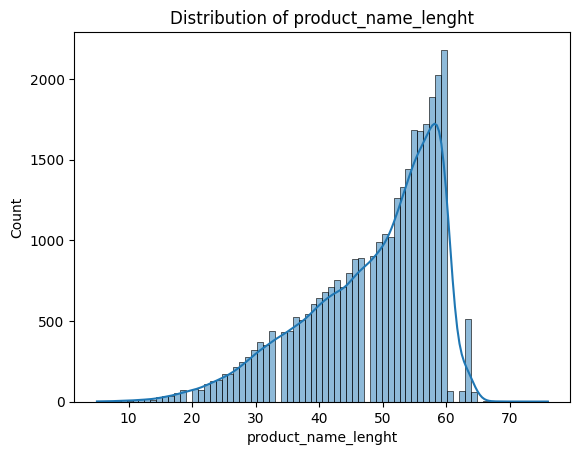

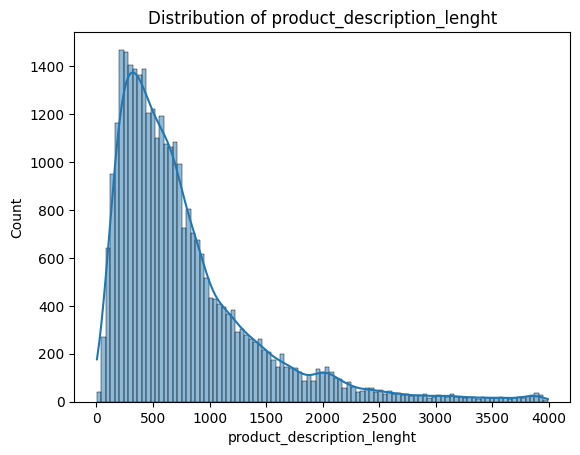

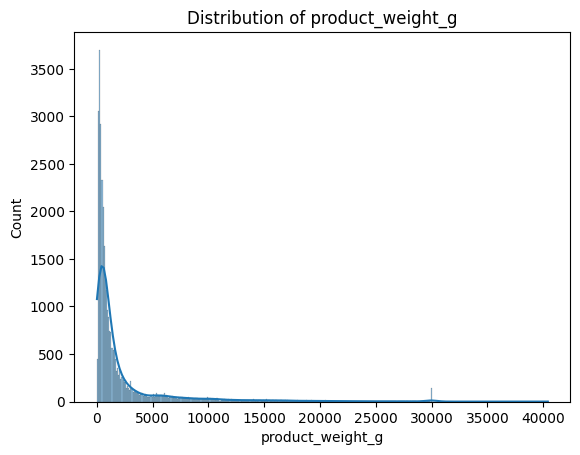

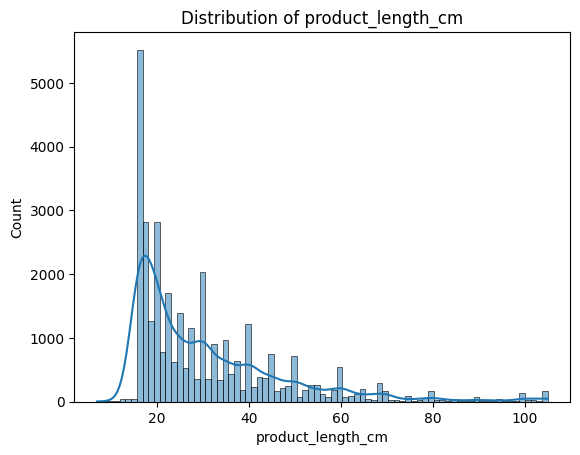

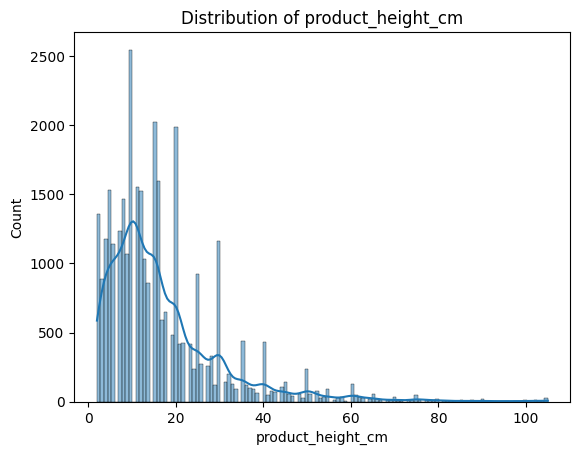

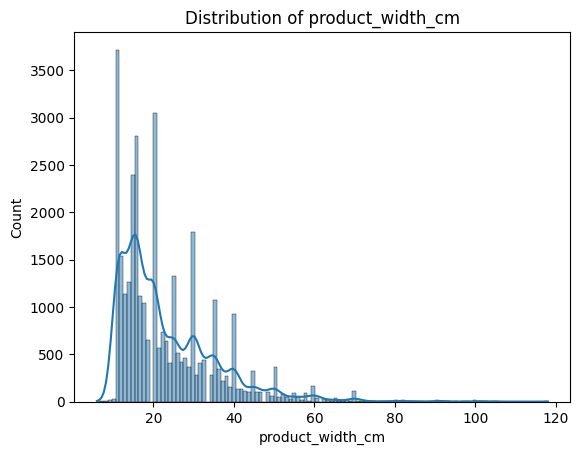

In [17]:
variables = ['product_name_lenght', 'product_description_lenght', 'product_weight_g',
             'product_length_cm', 'product_height_cm', 'product_width_cm']
for var in variables:
    sns.histplot(products_data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

Analysis:

- **Distribution of product_name_lenght**: The distribution shows that most product names are concentrated around a common length, indicating a preferred naming convention.
- **Distribution of product_description_lenght**: This distribution is highly right-skewed, suggesting that while most products have relatively short descriptions, there is a significant number with much longer descriptions.
- **Distribution of product_weight_g**: Extremely right-skewed with most products being light and a few exceptionally heavy products, indicating a few outliers or special items.
- **Distribution of product_length_cm**: The distribution has a prominent peak at a lower range, indicating a standard product length with some larger outliers.
- **Distribution of product_height_cm**: Right-skewed with multiple peaks, suggesting that certain product heights are more common than others.
- **Distribution of product_width_cm**: Also right-skewed with a peak at the lower end, showing a commonality in product widths with some exceptions extending to larger sizes.

3- Comparative Analysis of Dimensions and Weights across Product Categories using Boxplots

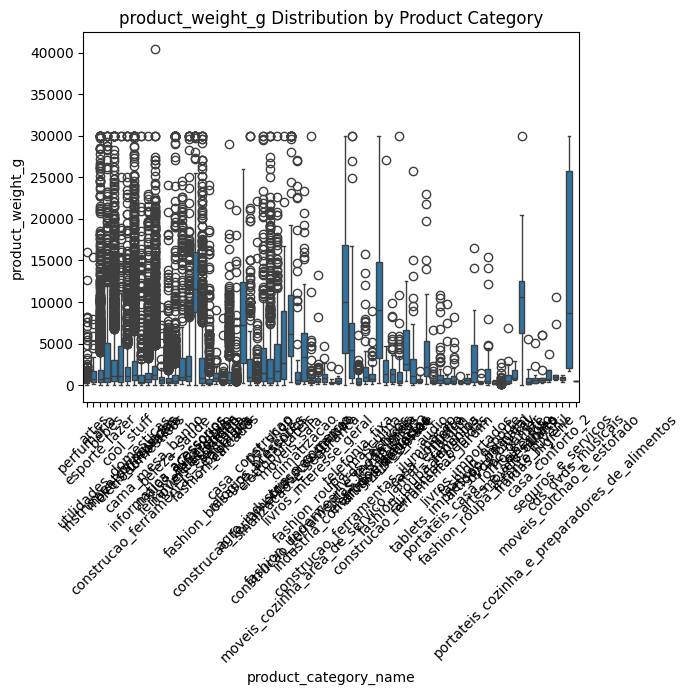

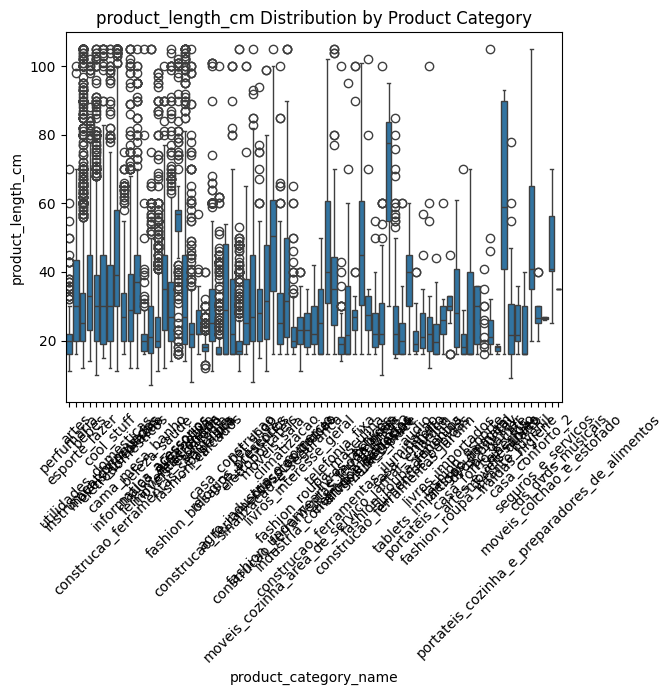

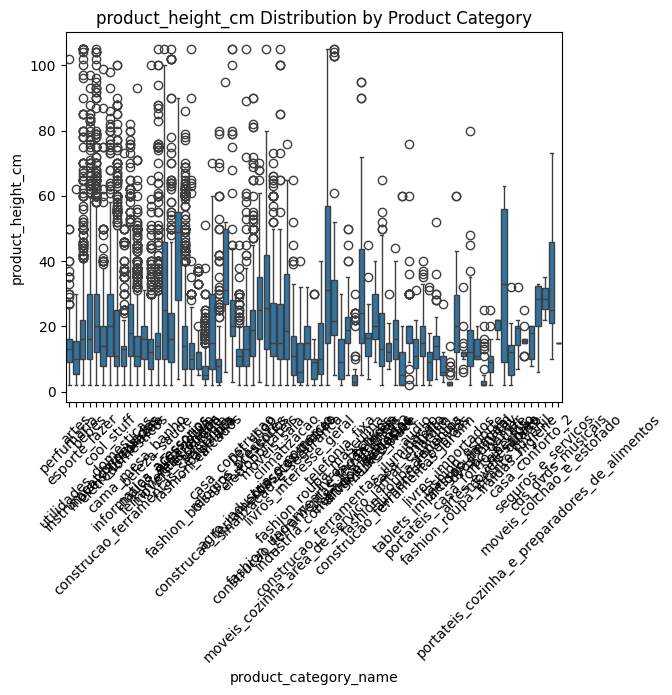

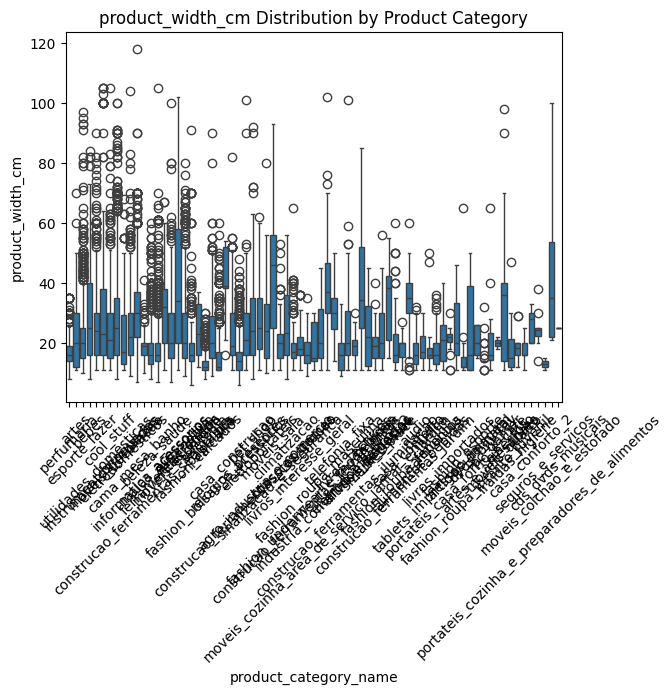

In [18]:
for column in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    sns.boxplot(x='product_category_name', y=column, data=products_data)
    plt.title(f'{column} Distribution by Product Category')
    plt.xticks(rotation=45)
    plt.show()

Analysis:

The box plots across different product categories show considerable variation in product dimensions and weight, reflecting a diverse range of product types, from lightweight and compact items to heavy and bulky goods.

4- Photos Quantity Analysis across Product Categories using boxplots

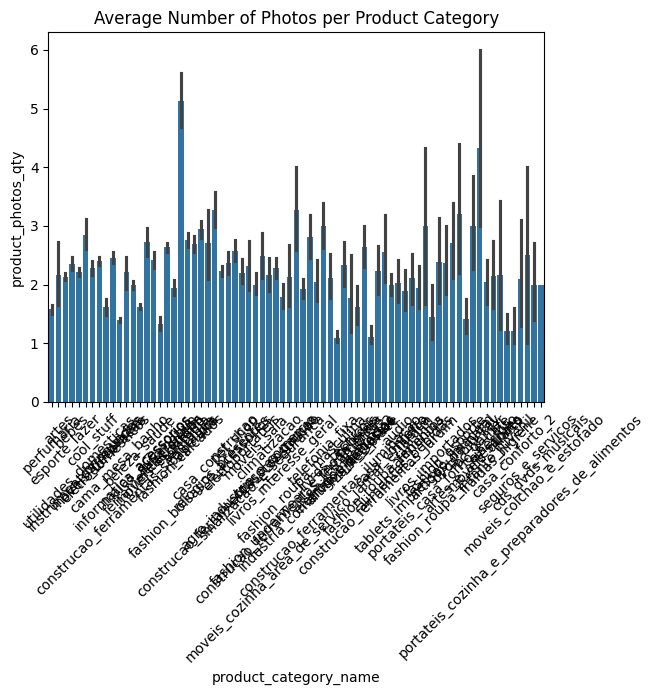

In [19]:
# Bar plot showing the average number of photos per category
sns.barplot(x='product_category_name', y='product_photos_qty', data=products_data, estimator=lambda x: sum(x) / len(x))
plt.title('Average Number of Photos per Product Category')
plt.xticks(rotation=45)
plt.show()

Analysis:

The bar chart shows variability in the average number of photos per product category, with some categories showing a high average and wide variance, suggesting that visual representation plays a variable but sometimes significant role in product listings across categories.

5- Correlation between Dimension columns using a Correlation Matrix

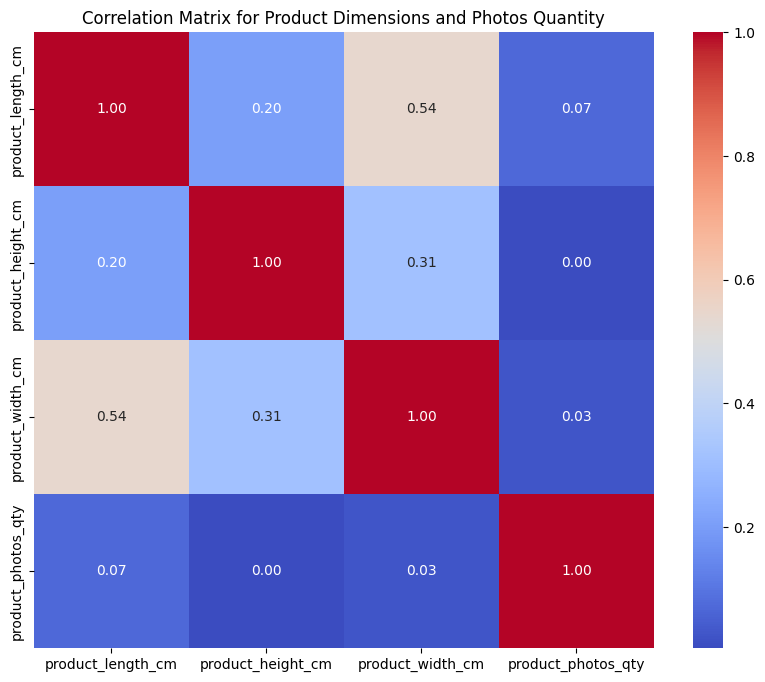

In [20]:
columns = ['product_length_cm', 'product_height_cm', 'product_width_cm', 'product_photos_qty']
correlation_matrix = products_data[columns].corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Product Dimensions and Photos Quantity')
plt.show()

Analysis:

The correlation matrix indicates that product length and width have a moderate positive correlation, suggesting they often increase together, while the number of product photos shows little to no correlation with product dimensions, implying that the size of the product does not significantly influence the quantity of photos provided.

# Data Cleaning and Preprocessing

1- Renaming columns

In [21]:
products_data = products_data.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

Here, we renamed columns  **product_name_lenght** and **product_description_lenght**  to **product_name_length** and **product_description_length** to fix the typos

2- Dropping rows with missing values

In [22]:
products_data.dropna(inplace=True)

Here, we dropped the 610 rows that have missing values in product_category_name, product_name_length, product_description_length, and product_photos_qty columns . Additionally, we dropped the 2 rows that have missing values in product_weight_g, product_length_cm, product_height_cm, and product_width_cm columns.

In [23]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_length         32340 non-null  float64
 3   product_description_length  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [24]:
products_data['product_id'].nunique()

32340

Now, we have a clean and preprocessed dataframe with 32340 rows.

In [25]:
import pandas as pd
import pymysql

# Connect to the database
conn = pymysql.connect(host='localhost', user='root', passwd='SQL@123', db='olist', port=3306)
try:
    # Create a cursor object
    cursor = conn.cursor()

    # Insert DataFrame row by row
    for index, row in products_data.iterrows():
        # Replace 'customers' with your actual table name
        sql = "INSERT INTO products (product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm , product_width_cm ) VALUES (%s, %s, %s, %s,%s, %s,%s, %s,%s)"
        cursor.execute(sql, (row['product_id'], row['product_category_name'], row['product_name_length'], row['product_description_length'], row['product_photos_qty'], row['product_weight_g'], row['product_length_cm'], row['product_height_cm'], row['product_width_cm']))
    
    # Commit changes
    conn.commit()
    
except Exception as e:
    print(f"An error occurred: {e}")
    conn.rollback()  # Rollback in case there is any error
finally:
    conn.close()  # Close the connection